In [42]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from lmfit import Model, Parameters

Prey-Predator model with B.O.

In [43]:
T = 10
Nt = int(2*T)
dt = T/Nt
x0 = 1
y0 = 0.1
t = 0   # this is today
rho = 0
alpha = 0.25
beta = 0.2
gamma = 0.1
delta = 0.1
dim = 2
def make_param_0():
    params = Parameters()
    params.add(f"f0", 0.1, min=0, max=2)
    params.add(f"f1", 0.1, min=0, max=1)
    params.add(f"g", -0.01, min=-0.1, max=0)
    return params

# Exact solution
tt=np.arange(0,T+dt,dt)
x_ex = np.zeros((Nt+1,2))
for ii,ti in enumerate(tt):
    if ii==0:
        x_ex[ii,:] = np.array([x0,y0])
    else:
        x_ex[ii,0] = x_ex[ii-1,0] + dt*x_ex[ii-1,0]*(alpha-beta*x_ex[ii-1,1]-rho*x_ex[ii-1,0])
        x_ex[ii,1] = x_ex[ii-1,1] + dt*x_ex[ii-1,1]*(-gamma+delta*x_ex[ii-1,0])


def compute_F(theta):
    F = np.array([[theta[0],     0],
                [0,     theta[1]]])
    return F

def compute_G(theta):
    G = np.array([[0,     theta[2]],
                [theta[2],     0]])
    return G

# Define the transition function
def fx(x, theta):
    F = compute_F(theta)
    G = compute_G(theta)
    return np.dot(F, x) + np.dot(x, np.dot(G,x))

# Assign the initial x array
x_0 = np.array([x0, y0])

# Define the acquisition function
def get_sensor_reading(i):
    return x_ex[i,:]

# Define the cost function
def J(t, f0, f1, g):
    k=t.shape[0]
    X = np.empty((k,2))
    X[0,:] = np.array([x0,y0])
    for i in range(k-2):
        X[i+1,:] = fx(X[i,:], np.array([f0, f1, g]))
    return X

# Predict/Update loop
nitmax=10
tt=np.arange(0,T+dt,dt)
x_hat = np.zeros((Nt+1,2))
x_hat[0,:]=x_0
params = make_param_0()
for k, t in enumerate(tt):
    print('Time: '+str(t))
    if k>0:
        fmodel= Model(J)
        data = x_ex[0:k,:].copy()
        result = fmodel.fit(data, params, t=np.arange(0,k), max_nfev=1000)
        params=result.params
        theta = np.array([params['f0'], params['f1'], params['g']])
        x_hat[k,:] = fx(x_hat[k-1,:], theta)
        print('theta = ', theta)
        print('x = ', x_hat[k,:])

Time: 0.0
Time: 0.5


TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 5.0)

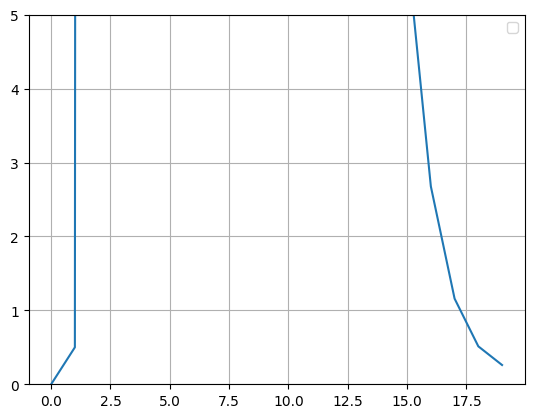

In [ ]:
plt.figure()
plt.plot(J_list)
plt.legend()
plt.grid(True)
plt.ylim((0,5))

Text(0.5, 0, 'Prey [-]')

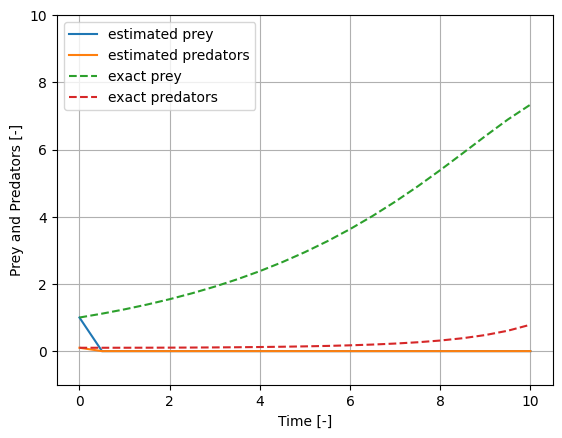

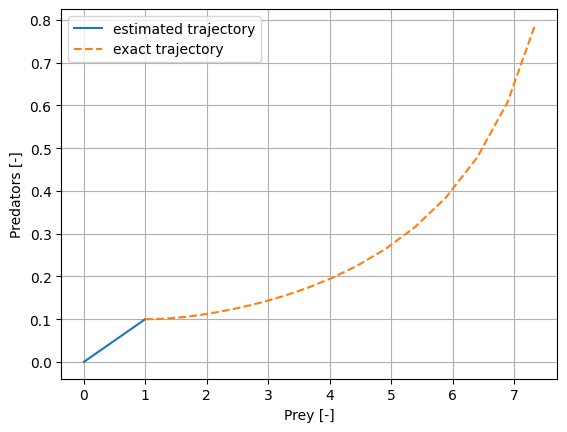

In [ ]:
plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,0], label='estimated prey')
plt.plot(tt,x_hat[:,1], label='estimated predators')
plt.plot(tt,x_ex[:,0], label='exact prey', linestyle='--')
plt.plot(tt,x_ex[:,1], label='exact predators', linestyle='--')
plt.legend()
plt.ylabel('Prey and Predators [-]')
plt.xlabel('Time [-]')
plt.ylim((-1,10))

plt.figure()
plt.grid(True)
plt.plot(x_hat[:,0],x_hat[:,1], label='estimated trajectory')
plt.plot(x_ex[:,0],x_ex[:,1], label='exact trajectory', linestyle='--')
plt.legend()
plt.ylabel('Predators [-]')
plt.xlabel('Prey [-]')